# A Distribution of 72 Years of Seattle Rainfall
## Using histograms to show Seattle's annual rainfall distribution
## What are the past trends in Seattle rainfall?
## Is Seattle getting wetter or drier?

Living in the Seattle area, many will probably agree that it rains quite often. It may seem like it rains quite a bit
every year. Do the annual amounts of rainfall vary greatly from year to year? Are there any general trends in the amount
of rainfall Seattle receives? Could past observations give an idea of what is to come in future years? In this project, we will look at the distribution of Seattle's annual rainfall. We will also see if we observe any general trends in the annual amounts of rainfall in the Seattle area. 

In [1]:
# Importing the necessary Python libraries
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Uploading the Seattle rainfall csv file as a Pandas DataFrame 
seattle_rainfall = pd.read_csv("C:\\Users\\teamd\\GitHub Projects 1\\seattle_rainfall.csv")

In [3]:
print(type(seattle_rainfall))
# Though it is only one column of data, it is still showing as a DataFrame type
print(seattle_rainfall.head(3))
print(seattle_rainfall.shape)
print(seattle_rainfall.size)
print(len(seattle_rainfall))

<class 'pandas.core.frame.DataFrame'>
   Inches
0   45.79
1   32.46
2   55.14
(72, 1)
72
72


In [4]:
seattle_annual_rainfall = seattle_rainfall['Inches'] # Selecting the sole column to get a series

In [5]:
print(type(seattle_annual_rainfall))
seattle_annual_rainfall.head(3)

<class 'pandas.core.series.Series'>


0    45.79
1    32.46
2    55.14
Name: Inches, dtype: float64

The total length of this dataset is 72 which represents the annual rainfall in Seattle from the year 1948 on up to 2019. Here is the link to where this data can be found:
[Link](https://www.seattleweatherblog.com/rain-stats/)

In [6]:
# Finding the mean and median annual rainfall
print(seattle_annual_rainfall.mean())
print(seattle_annual_rainfall.median())
average_rainfall = 38.72333333333333 # Variable to be used as a vertical axis line in the histogram below
median_rainfall = 38.05 # Variable to be used as a vertical axis line in the histogram below
minimum_rainfall = seattle_annual_rainfall.min() # Finding the minimum annual rainfall recorded
print(minimum_rainfall)
maximum_rainfall = seattle_annual_rainfall.max() # Finding the maximum annual rainfall recorded
print(maximum_rainfall)
standard_deviation_rainfall = seattle_annual_rainfall.std() # Finding the standard deviation for rainfall recorded
print(standard_deviation_rainfall)

38.72333333333333
38.05
23.78
55.14
6.651712264998992


To make a histogram and show the distribution of rainfall totals, the series will be converted into a Numpy array. The values will then be rounded to the nearest 5. The goal is to figure out how many years did Seattle have rainfall around 25 inches, 30 inches, 35 inches, and so forth. Based on the distribution of data and using the number of total years, one could state what the probability of having around 25, 30, 35, or so forth inches will be for 2020. 

In [7]:
annual_rainfall =  np.array(seattle_annual_rainfall) # Creating an array of the annual rainfall measurements

In [8]:
print(annual_rainfall)

[45.79 32.46 55.14 40.3  23.78 49.42 41.27 46.61 36.85 34.63 42.63 46.52
 39.28 42.53 35.79 38.72 41.34 33.56 38.23 35.58 50.15 33.73 37.41 43.21
 48.36 35.04 37.87 44.48 26.7  32.84 33.99 32.26 35.6  35.4  39.32 40.93
 36.99 25.13 38.34 29.93 32.98 34.69 44.75 35.42 32.78 28.8  34.82 42.6
 50.67 43.26 44.06 42.11 28.66 37.56 31.36 41.78 31.1  35.44 48.82 38.95
 30.73 38.44 46.99 36.39 48.26 32.56 48.5  44.83 45.18 47.87 35.73 33.88]


In [9]:
rounded_annual_rainfall = np.round(annual_rainfall/5, decimals = 0) * 5 # Rounding to the nearest 5 integer

In [10]:
print(rounded_annual_rainfall)

[45. 30. 55. 40. 25. 50. 40. 45. 35. 35. 45. 45. 40. 45. 35. 40. 40. 35.
 40. 35. 50. 35. 35. 45. 50. 35. 40. 45. 25. 35. 35. 30. 35. 35. 40. 40.
 35. 25. 40. 30. 35. 35. 45. 35. 35. 30. 35. 45. 50. 45. 45. 40. 30. 40.
 30. 40. 30. 35. 50. 40. 30. 40. 45. 35. 50. 35. 50. 45. 45. 50. 35. 35.]


In [11]:
# Finding the mode of this dataset
from scipy import stats
stats.mode(rounded_annual_rainfall)

ModeResult(mode=array([35.]), count=array([23]))

Running some statistics on the rounded values to see how they compare to the non-rounded values

In [12]:
rounded_annual_rainfall_mean = rounded_annual_rainfall.mean()
print(rounded_annual_rainfall_mean)
rounded_annual_rainfall_median = np.median(rounded_annual_rainfall)
print(rounded_annual_rainfall_median)
min_rounded_annual_rainfall = rounded_annual_rainfall.min()
print(min_rounded_annual_rainfall)
max_rounded_rainfall = rounded_annual_rainfall.max()
print(max_rounded_rainfall)
std_rounded_annual_rainfall = rounded_annual_rainfall.std()
print(std_rounded_annual_rainfall)

38.958333333333336
40.0
25.0
55.0
6.817945071647322


Annual rainfall totals rounding to 35 inches are the most common with 23 of the past 72 years
having this amount. 

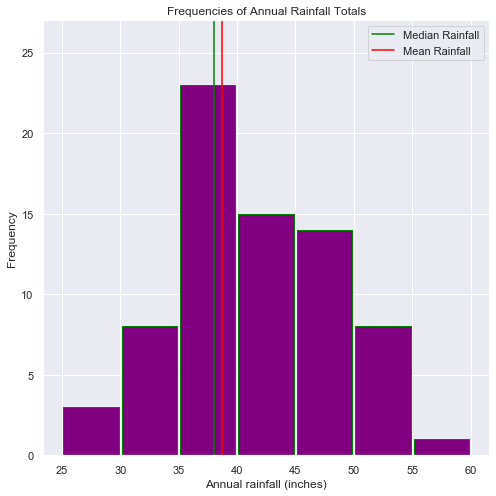

In [13]:
sns.set() # Giving a default setting to provide more modern looking visualizations using Seaborn.
desired_bins = [25, 30, 35, 40, 45, 50, 55, 60] # Creating custom bins so that x-tick marks align better
plt.figure(figsize = (8, 8)) # Adjusting figure size for easier readability. 
plt.hist(rounded_annual_rainfall, bins=desired_bins, ec = 'k', rwidth = 0.95, color = 'purple', edgecolor = 'green',)
axes =plt.axes()
axes.set_ylim(0, 27)
plt.axvline(median_rainfall, color = 'green', label = 'Median Rainfall')
plt.axvline(average_rainfall, color = 'red', label = 'Mean Rainfall')
plt.legend()
plt.xlabel('Annual rainfall (inches)')
plt.ylabel('Frequency')
plt.title('Frequencies of Annual Rainfall Totals')
plt.show()

### The stats revisited (non-rounded dataset)
* Mean = 38.72333333333333 
* Median = 38.05
* Min = 23.78
* Max = 55.14
* std = 6.651712264998992

### Stats for rounded values
* Mean = 38.958333333333336
* Median = 40.0
* Min = 25.0
* Max = 55.0
* std = 6.817945071647322


In [14]:
def std_calc(mean, std): # Defining a function to calculate one, two, and three standard deviations from the mean.
    one_std = ((mean - std), (mean + std))
    two_std = ((mean - 2 * std), (mean + 2 * std))
    three_std = ((mean - 3 * std), (mean + 3 * std))
    return one_std, two_std, three_std
      

non_rounded_data = std_calc(average_rainfall, standard_deviation_rainfall) # Non-rounded data
print(non_rounded_data)
print('\n')
rounded_data = std_calc(rounded_annual_rainfall_mean, std_rounded_annual_rainfall) # Rounded data
print(rounded_data)
      

((32.07162106833434, 45.37504559833232), (25.419908803335346, 52.02675786333131), (18.76819653833635, 58.678470128330304))


((32.14038826168601, 45.77627840498066), (25.32244319003869, 52.59422347662798), (18.50449811839137, 59.412168548275304))


When it comes to measuring rainfall, this would be an example of analyzing continuous data as any measurement of rainfall can have infinite measurements within a given range. For example: Let us assume that we know it is going to rain somewhere between 30 and 31 inches in Seattle in 2020. The measurement of rainfall can fall within any range between 30 and 31 inches. It could rain 30.01, 30.44, 30.999, or maybe even 30.000001 inches. When recording the annual rainfall, it is typically common to measure out to the hundredths as measuring to the thousandths or ten thousandths would more than likely be completely unnecessary. 

In light of this, I decided to make the data points more discrete by rounding off the annual rainfall measurements to the nearest 5. For instance, if it rained 33.75 inches in a given year, the value would be raised to nearest 5 value, which in this case is 35 inches. 

For the past 72 years, the average recorded rainfall is about 38.72 inches which is different from the 37.49 inches that is stated on the website where this data can be found. The median rainfall is 38.05 inches which is within one inch of the mean. The minimum and maximum rainfall ever recorded annually is 23.78, and 55.14 inches, respectively. Looking at the chart above, annual rainfall of around 35 inches is the most common with having 23 out of the past 72 years having this measurement. Years consisting of around 40 and 45 inches of recorded rainfall are also common. When factoring values that are within one standard deviation of the mean, using both the non-rounded and rounded values, the 35, 40, and 45 inch bins are within one standard deviation of the mean. In total, 52 of the past 72 years fall into either the 35, 40, or 45 inch bins in the chart above. One may be tempted to predict that given the proportion of years, 0.722, or percentage of years, 72.2% of the past 72 years having rainfall within these ranges that the probability of having rainfall totaling around 35 inches to 45 inches in 2020 is approximately 72%. 

Using Seaborn to further investigate this univariate distribution of annual recorded rainfall
in Seattle.
* All figures below will use non-rounded numbers

Text(0, 0.5, 'Frequency')

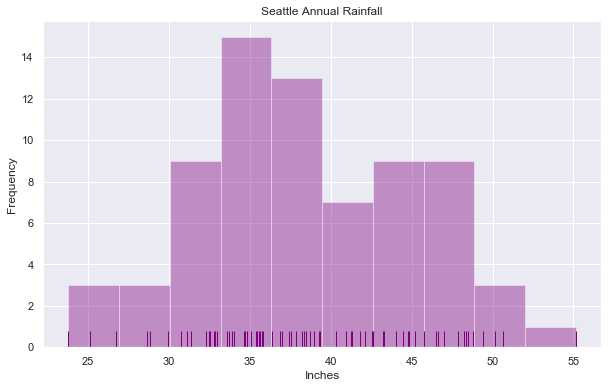

In [15]:
plt.figure(figsize = (10,6))
sns.distplot(seattle_rainfall['Inches'], bins = 10, rug=True, kde=False, hist=True, norm_hist=False, color = 'purple')
plt.title('Seattle Annual Rainfall')
plt.ylabel('Frequency')

The chart above is in relation to the non-rounded values. Each of the darker small lines at the bottom of the chart represents the annual rainfall for a given year. Upon observing the locations of these lines, the majority appear to be from 32.5 inches on up to 45 inches, with a slight dip around the 40 inch to 42.5 inch range. Outside of this range, there are fewer lines. As we approach the 25 inch or 55 inch range, there are even fewer of these lines. 

Text(0.5, 1.0, 'Seattle Annual Rainfall')

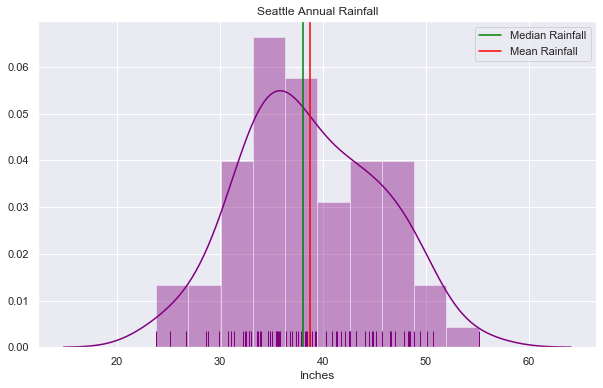

In [16]:
from scipy import stats
plt.figure(figsize = (10, 6))
sns.distplot(seattle_rainfall['Inches'], bins = 10, rug = True, color = 'purple')
plt.axvline(median_rainfall, color = 'green', label = 'Median Rainfall')
plt.axvline(average_rainfall, color = 'red', label = 'Mean Rainfall')
plt.legend()
plt.title('Seattle Annual Rainfall')

The diagram above depicting a unimodal histogram, shows that both the mean and the median are slightly to the right of the peak. In a symmetrical distribution, both the mean and the median would be at the peak. As seen above, the mean is to the right of the median. This is often indicative of a right-skewed distribution where there is a distinct peak and tail that extends outward towards the right. In such distributions, the mean is greater than the median. Whereas in a left-skewed distribution, the tail extends to the left along with having the mean value be lesser than the median value. 

Text(0.5, 1.0, 'Seattle Annual Rainfall')

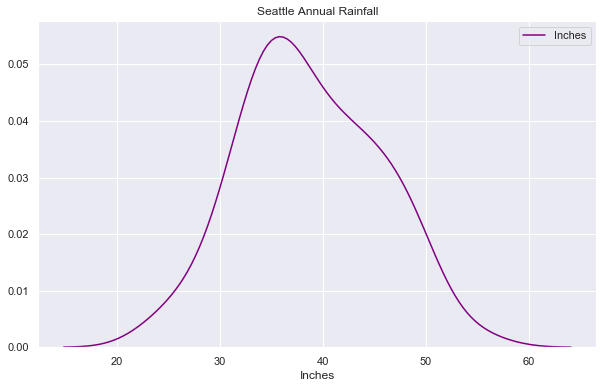

In [17]:
plt.figure(figsize = (10, 6))
sns.kdeplot(seattle_rainfall['Inches'], color = 'purple')
plt.xlabel('Inches')
plt.title('Seattle Annual Rainfall')

## Creating a line chart to visually show the annual rainfall patterns

In [18]:
# Creating the values for the x values
# The y values will be the annual inches of rainfall
years = list(range(1948, 2020))

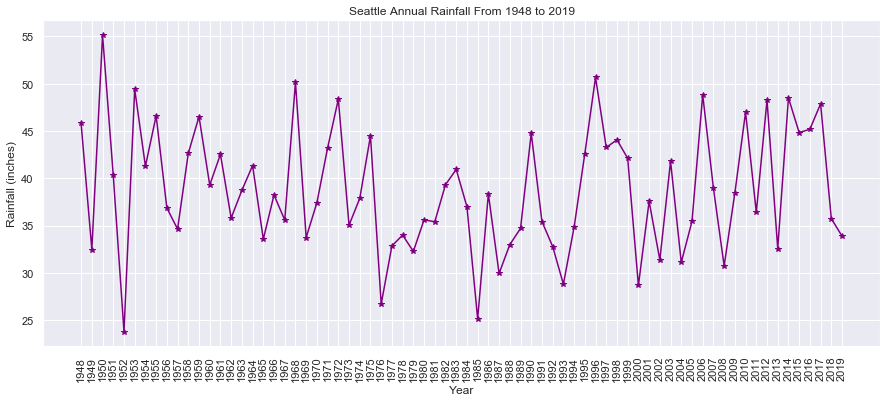

In [19]:
plt.figure(figsize = (15, 6))
plt.plot(years, annual_rainfall, marker = '*', color = 'purple')
plt.xticks(years, rotation= 90)
plt.title('Seattle Annual Rainfall From 1948 to 2019')
plt.ylabel('Rainfall (inches)')
plt.xlabel('Year')
plt.show()

Looking at the line chart above, annual rainfall amounts appear to fluctuate up and down. This is an example of a volitile looking graph that does not give any clear trends. Using a moving average to plot the graph may help us to give a better visualization of any trends in rainfall. A five-year moving average will be used. 

## Using moving averages to better visualize trends

In [20]:
annual_rainfall

array([45.79, 32.46, 55.14, 40.3 , 23.78, 49.42, 41.27, 46.61, 36.85,
       34.63, 42.63, 46.52, 39.28, 42.53, 35.79, 38.72, 41.34, 33.56,
       38.23, 35.58, 50.15, 33.73, 37.41, 43.21, 48.36, 35.04, 37.87,
       44.48, 26.7 , 32.84, 33.99, 32.26, 35.6 , 35.4 , 39.32, 40.93,
       36.99, 25.13, 38.34, 29.93, 32.98, 34.69, 44.75, 35.42, 32.78,
       28.8 , 34.82, 42.6 , 50.67, 43.26, 44.06, 42.11, 28.66, 37.56,
       31.36, 41.78, 31.1 , 35.44, 48.82, 38.95, 30.73, 38.44, 46.99,
       36.39, 48.26, 32.56, 48.5 , 44.83, 45.18, 47.87, 35.73, 33.88])

In [21]:
def moving_avg(nums, window):
    weights = np.repeat(1.0, window)/window
    smas = np.convolve(nums, weights, 'valid') 
    return smas

Using 'valid' in the above function only runs the moving average on valid points. Using a 5-year moving average, it would probably be pointless to run the function on the first few data points in the dataset. For example, 45.79 amd 32.46 are the first two data points in the dataset displayed above. Without inserting 'valid', these two data points would be added and then divived by 5, if using a moving average of five. 

In [22]:
five_year_avg = moving_avg(annual_rainfall, 5)

In [23]:
print(len(five_year_avg))
print(five_year_avg)

68
[39.494 40.22  41.982 40.276 39.586 41.756 40.398 41.448 39.982 41.118
 41.35  40.568 39.532 38.388 37.528 37.486 39.772 38.25  39.02  40.016
 42.572 39.55  40.378 41.792 38.49  35.386 35.176 34.054 32.278 34.018
 35.314 36.702 37.648 35.554 36.142 34.264 32.674 32.214 36.138 35.554
 36.124 35.288 35.314 34.884 37.934 40.03  43.082 44.54  41.752 39.13
 36.75  36.294 34.092 35.448 37.7   39.218 37.008 38.476 40.786 38.3
 40.162 40.528 42.54  42.108 43.866 43.788 44.422 41.498]


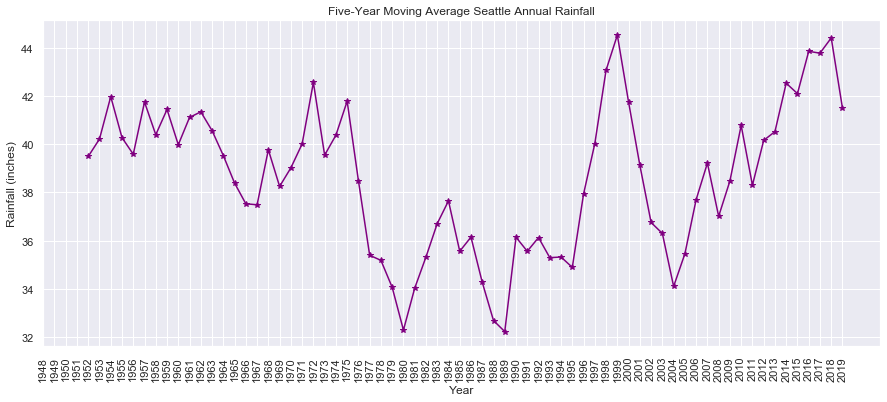

In [24]:
plt.figure(figsize = (15, 6))
plt.plot(years[4:], five_year_avg, marker = '*', color = 'purple')
plt.xticks(years, rotation= 90)
plt.title('Five-Year Moving Average Seattle Annual Rainfall')
plt.ylabel('Rainfall (inches)')
plt.xlabel('Year')
plt.show()

Looking at the chart above, it is slightly easier to observe some general patterns in trends of Seattle's annual rainfall. One thing to note is the first 4 years are not included in the graph above due to them not being considered valid points in the function used to calculate the moving average. From 1952 to 1975, annual rainfall amounts appear to be somewhat consistent by mostly averaging in the 38 to 42 inch range. During a 20-year span, 1975 to 1995, rainfall amounts take a dive and remain below what they were in previous years. From 1995 to 1999 there is an upward trend in annual rainfall. This upward trend is followed by a downward trend from 2000 to 2004. In the years following 2004, Seattle's annual rainfall appears to be on an upward trend.

Moving averages can help to smooth out the chart as demonstrated above making it easier to observe trends. For experimental purposes, let us see what happens if we use a 10-year moving average. 

In [25]:
ten_year_avg = moving_avg(annual_rainfall, 10)

In [26]:
print(len(ten_year_avg))
print(ten_year_avg)

63
[40.625 40.309 41.715 40.129 40.352 41.553 40.483 40.49  39.185 39.323
 39.418 40.17  38.891 38.704 38.772 40.029 39.661 39.314 40.406 39.253
 38.979 37.363 37.216 37.035 36.254 35.35  35.939 35.851 33.916 35.08
 34.789 34.688 34.931 35.846 35.848 35.194 33.981 33.764 35.511 36.744
 38.077 39.185 39.927 38.318 38.532 38.39  39.688 39.316 38.6   38.415
 37.984 36.651 36.284 38.117 38.    39.69  38.768 40.508 41.447 41.083
 41.975 42.475 42.019]


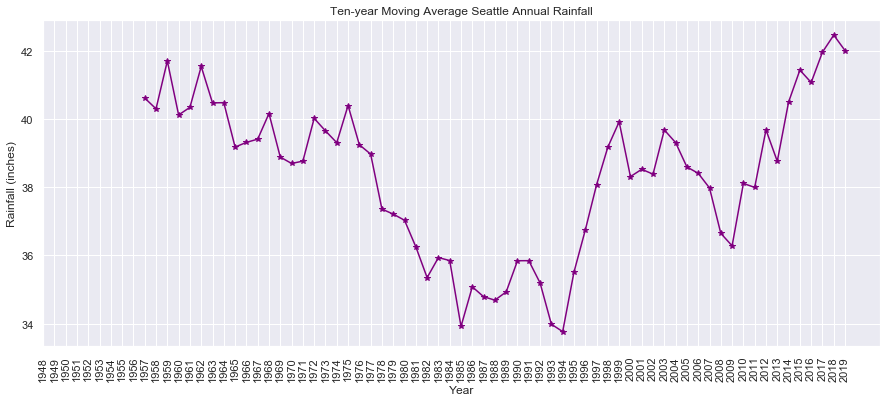

In [27]:
plt.figure(figsize = (15, 6))
plt.plot(years[9:], ten_year_avg, marker = '*', color = 'purple')
plt.xticks(years, rotation = 90)
plt.title('Ten-year Moving Average Seattle Annual Rainfall')
plt.ylabel('Rainfall (inches)')
plt.xlabel('Year')
plt.show()

By further increasing the moving average, we begin to see more generalized trends in Seattle's annual rainfall. Once again, it is important to note that the first nine data points were omitted in the calculation due to not including those data points in the function used to calculate the moving average. Looking at the chart above, there is a general downward trend in rainfall until 1994. From 1994 to 2019, there is a general upward trend with a six-year downward trend (2004 to 2009), before going back in an upward trajectory. 

The chart below will plot the original, five-year moving average, and 10-year moving average values to demonstrate how moving averages can help to better visualize trends in datasets. 

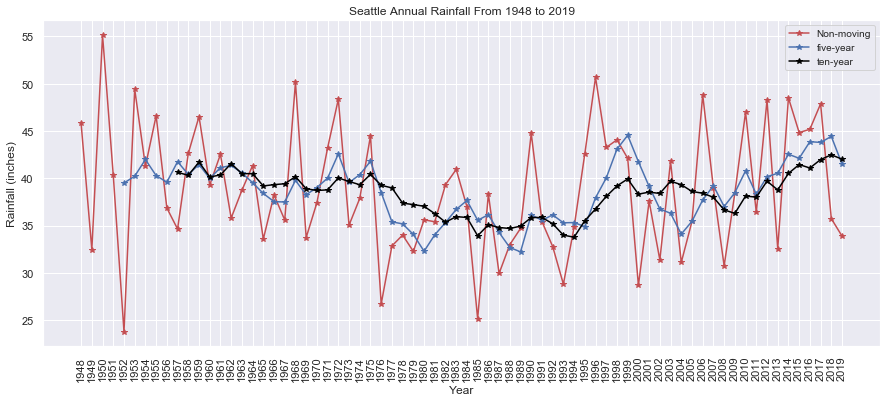

In [28]:
plt.figure(figsize = (15, 6))
plt.plot(years, annual_rainfall, marker = '*', color = 'r')
plt.plot(years[4:], five_year_avg, marker = '*', color = 'b')
plt.plot(years[9:], ten_year_avg, marker = '*', color = 'black')
plt.xticks(years, rotation= 90)
plt.title('Seattle Annual Rainfall From 1948 to 2019')
plt.ylabel('Rainfall (inches)')
plt.xlabel('Year')
plt.legend(['Non-moving', 'five-year', 'ten-year'], prop={'size':10})
plt.show()


Looking at the figure above, using a 10-year moving average appears to give us a clearer picture of Seattle's annual rainfall trends. As of now, it does look like Seattle is getting wetter. How much wetter? Will Seattle's rainfall eventually go back on a downward trajectory? Some further questions to consider are: How might sea surface temperatures be influencing rainfall patterns in the Seattle or surrounding areas? How will climate change affect future trends in Seattle's rainfall or other cities' rainfall? For now, it is safe to say there will be many more cloudy and rainy days in Seattle. 